In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cmcrameri.cm as cmc
#import pygmt

In [2]:
def myround(x, base=1):
    return base * round(x/base)

In [3]:
catalog = pd.read_csv('/home/earthquakes1/homes/Rebecca/phd/stf/data/combined_m55_catalog.csv', sep = '|')
cols = catalog.columns
column_names = []
for c in cols:
    column_names.append(c.strip().rstrip().lower())
column_names[0] = 'catalog_id'
catalog.columns = column_names
catalog['year'] = catalog.apply(lambda x: x['time'][:4], axis = 1)
catalog['month'] = catalog.apply(lambda x: x['time'][5:7], axis = 1)
catalog['day'] = catalog.apply(lambda x: x['time'][8:10], axis = 1)
catalog['hour'] = catalog.apply(lambda x: x['time'][11:13], axis = 1)
catalog['minute'] = catalog.apply(lambda x: x['time'][14:16], axis = 1)

catalog['event'] = catalog.apply(lambda x: x['year'] + x['month'] + x['day'] + '_' + x['hour'] + x['minute'], axis = 1)

catalog['int_magnitude'] = catalog.apply(lambda x: myround(x['magnitude']), axis = 1)
catalog.drop(columns = ['contributor', 'contributorid', 'magauthor', 'eventlocationname', 'author', 'catalog', 'time'], inplace = True)
catalog = catalog[['event', 'catalog_id', 'year', 'month', 'day', 'hour', 'minute', 'latitude', 'longitude', 'depth/km', 'magnitude', 'int_magnitude', 'magtype']]

In [4]:
combined = pd.read_csv('/home/earthquakes1/homes/Rebecca/phd/stf/data/combined_scardec_ye_usgs_sigloch_isc_mag.csv')

In [5]:
combined.columns = ['event', 'scardec', 'ye', 'isc', 'sigloch', 'usgs', 'mag']

In [6]:
magnitudes = []
depths = []
lat = []
lon = []
datasets = []
for i, row in combined.iterrows():
    for dataset in ['scardec', 'ye', 'usgs', 'sigloch', 'isc']:
        if row[dataset] == 0 or row[dataset] == '0':
            continue
        datasets.append(dataset)
        if row.event in catalog['event'].values:
            event_cat = catalog[catalog['event']==row.event]
            magnitudes.append(event_cat['magnitude'].values[0])
            depths.append(event_cat['depth/km'].values[0])
            lat.append(event_cat['latitude'].values[0])
            lon.append(event_cat['longitude'].values[0])
        else:
            magnitudes.append(row.mag)
            depths.append(np.nan)
            lat.append(np.nan)
            lon.append(np.nan)



In [7]:
dataset_info = pd.DataFrame({'dataset': datasets, 'magnitude': magnitudes, 'depth': depths, 'latitude': lat, 'longitude': lon})

In [8]:
colors = cmc.batlow(np.linspace(0, 1, 5))
unique_datasets = ['scardec', 'usgs', 'sigloch', 'ye', 'isc']
dataset_colors = {dataset: colors[i] for i, dataset in enumerate(unique_datasets)}

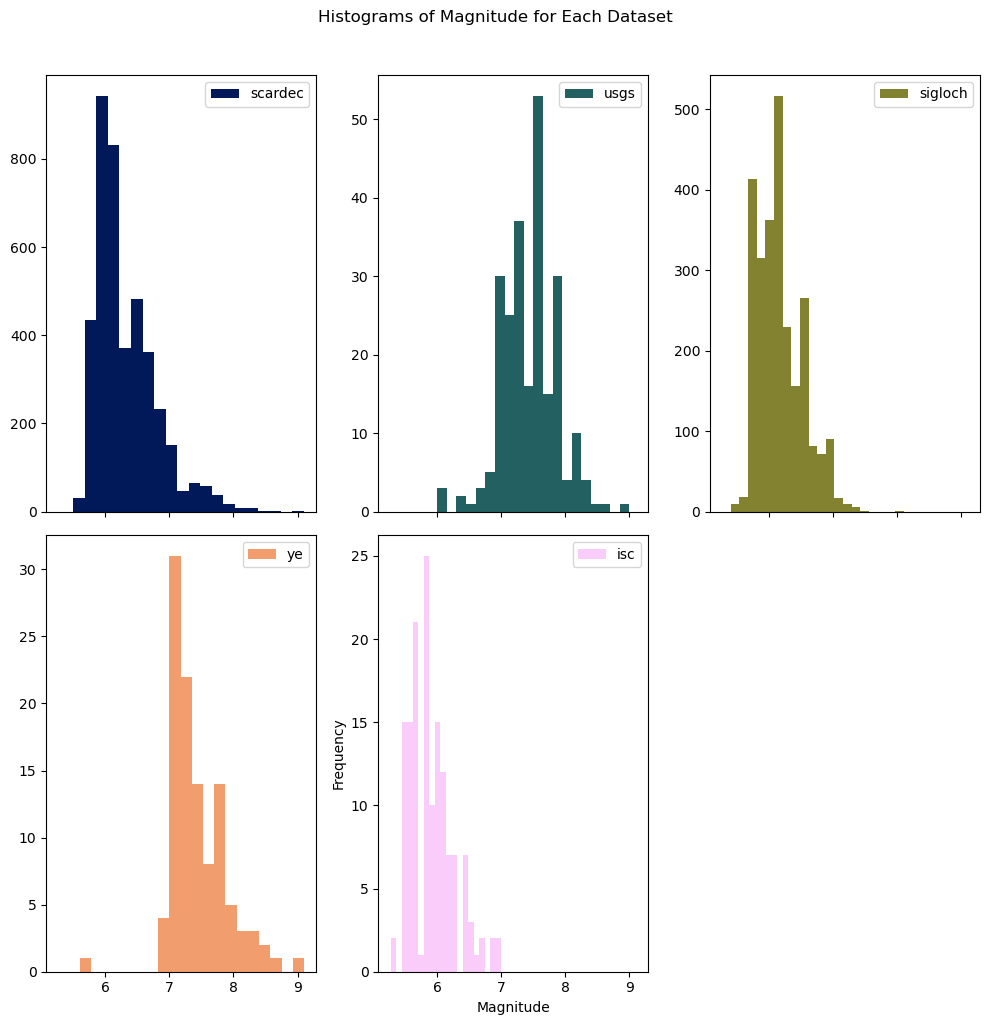

In [9]:
fig, axs = plt.subplots(2, 3, figsize=(10, 10), sharex=True)

for i, dataset in enumerate(unique_datasets):
    ax = axs.flatten()[i]
    subset = dataset_info[dataset_info['dataset'] == dataset]
    ax.hist(subset['magnitude'], bins=20, color=dataset_colors[dataset], label=dataset)
    ax.legend()

fig.delaxes(axs[1][2])
plt.suptitle('Histograms of Magnitude for Each Dataset', y=1.02)
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.tight_layout()

plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/catalog_data/histograms_of_magnitude_for_each_dataset.png')
plt.show()

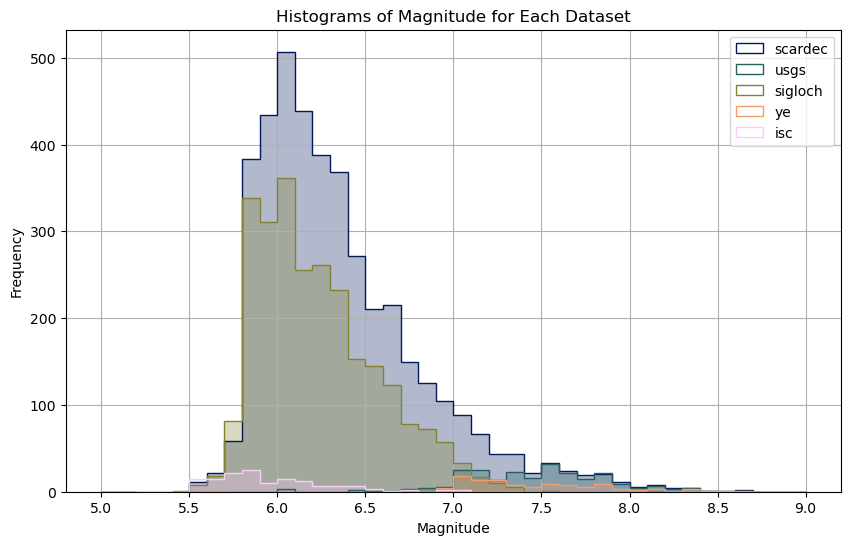

In [10]:
#colors = {'scardec': 'blue', 'ye': 'green', 'isc': 'red', 'sigloch': 'purple', 'usgs': 'orange'}
colors = dataset_colors
for dataset, color in colors.items():
	subset = dataset_info[dataset_info['dataset'] == dataset]
	subset['magnitude'].hist(bins=np.arange(5, 9.1, 0.1), alpha=1, label=dataset, color=color, figsize=(10, 6), histtype='step')
	subset['magnitude'].hist(bins=np.arange(5, 9.1, 0.1), alpha=.3, color=color, figsize=(10, 6))

plt.title('Histograms of Magnitude for Each Dataset')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.legend(colors.keys())
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/catalog_data/histograms_of_magnitude_for_each_dataset_all_on_one.png')
plt.show()

In [11]:
dataset_info['dataset'].value_counts()

dataset
scardec    4083
sigloch    2565
usgs        246
isc         147
ye          109
Name: count, dtype: int64

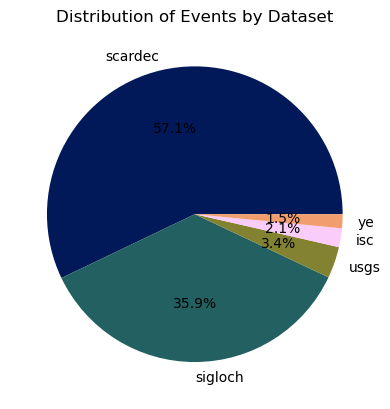

In [12]:
colors_for_pi = list(dataset_colors.values())
colors_for_pi[3], colors_for_pi[4] = colors_for_pi[4], colors_for_pi[3]
plt.pie(dataset_info['dataset'].value_counts(), labels=dataset_info['dataset'].value_counts().index, autopct='%1.1f%%', colors=colors_for_pi)
plt.title('Distribution of Events by Dataset')
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/catalog_data/distribution_of_STFs_by_dataset_pie.png')

In [13]:
combined

,event,scardec,ye,isc,sigloch,usgs,mag
0,20170818_0259,FCTs_20170818_025925_NORTH_OF_ASCENSION_ISLAND,0,0,0,0,6.591
1,20110126_1542,FCTs_20110126_154229_NORTHERN_SUMATRA__INDONESIA,0,0,0706.2011.026.a,0,6.114
2,19981010_1629,FCTs_19981010_162908_MINAHASSA_PENINSULA__SULA...,0,0,0,0,5.927
3,19920730_0824,FCTs_19920730_082446_XIZANG,0,0,0,0,6.017
4,19960327_2052,FCTs_19960327_205206_NEAR_COAST_OF_NICARAGUA,0,0,0,0,6.157
...,...,...,...,...,...,...,...
5610,20230206_1024,0,0,0,0,20230206_102448.txt,NaN
5611,20231202_1437,0,0,0,0,20231202_143704.txt,NaN
5612,19971108_1002,0,0,0,0,19971108_100252.txt,NaN
5613,20181220_1701,0,0,0,0,20181220_170155.txt,NaN


In [14]:
# Create a new column that shows the combination of dataset availability
combined['dataset_combination'] = combined.apply(lambda row: '+'.join([dataset for dataset in unique_datasets if row[dataset] != 0 and row[dataset] != '0']), axis=1)

# Count the number of rows for each combination
dataset_combination_counts = combined['dataset_combination'].value_counts()

print(dataset_combination_counts)

dataset_combination
scardec                    2126
scardec+sigloch            1639
sigloch                     909
                            492
scardec+usgs                140
isc                          86
scardec+isc                  60
scardec+ye                   51
scardec+usgs+ye              50
usgs                         42
scardec+usgs+sigloch         10
scardec+sigloch+ye            4
scardec+usgs+sigloch+ye       2
ye                            2
scardec+usgs+isc              1
usgs+sigloch                  1
Name: count, dtype: int64


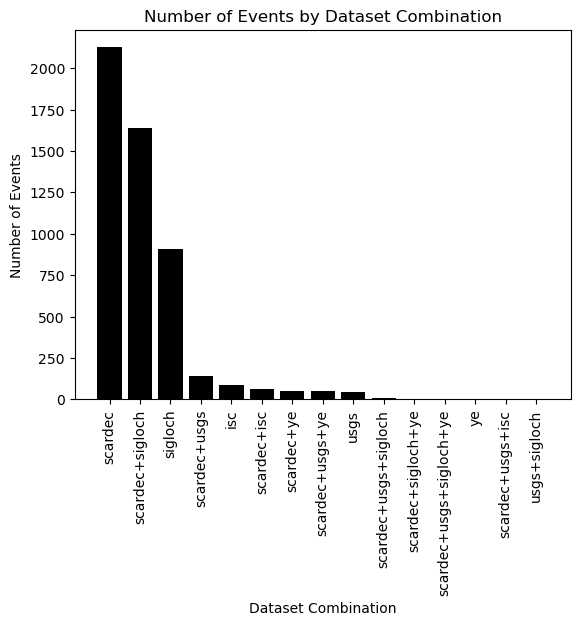

In [18]:
#plt.bar(combined['dataset_combination'].unique(), dataset_combination_counts)
filtered_combination_counts = dataset_combination_counts[dataset_combination_counts.index != '']
plt.bar(filtered_combination_counts.index, filtered_combination_counts.values, color = 'k')
plt.xticks(rotation=90)
plt.title('Number of Events by Dataset Combination')
plt.xlabel('Dataset Combination')
plt.ylabel('Number of Events')
#plt.tight_layout()
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/catalog_data/number_of_events_by_dataset_combination.png')

In [16]:
total_stf = sum(dataset_combination_counts)

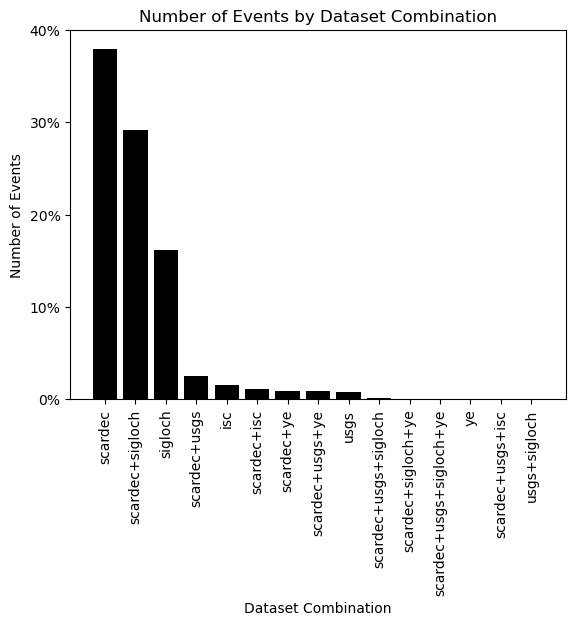

In [20]:
#plt.bar(combined['dataset_combination'].unique(), dataset_combination_counts)
filtered_combination_counts = dataset_combination_counts[dataset_combination_counts.index != '']
plt.bar(filtered_combination_counts.index, filtered_combination_counts.values/total_stf, color = 'k')
plt.xticks(rotation=90)
plt.title('Number of Events by Dataset Combination')
plt.xlabel('Dataset Combination')
plt.ylabel('Number of Events')
plt.yticks(np.arange(0, 1.1, 0.1), ['{:.0f}%'.format(i*100) for i in np.arange(0, 1.1, 0.1)])
plt.ylim(0, 0.4)
#plt.tight_layout()
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/catalog_data/number_of_events_by_dataset_combination_proportion.png', bbox_inches='tight', dpi=300)

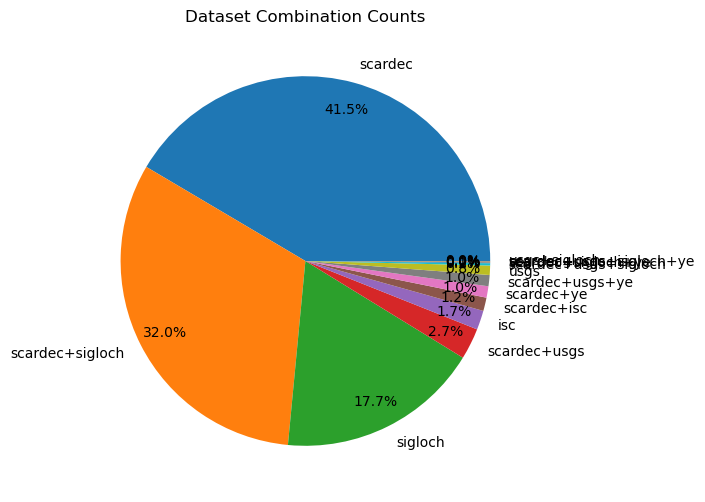

In [18]:
plt.figure(figsize=(10, 6))
plt.pie(filtered_combination_counts, labels=filtered_combination_counts.index, autopct='%1.1f%%', pctdistance=0.85, labeldistance=1.1)
plt.title('Dataset Combination Counts')
plt.show()

/tmp/ipykernel_438168/1151254742.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(filtered_combination_counts.index, rotation=90)


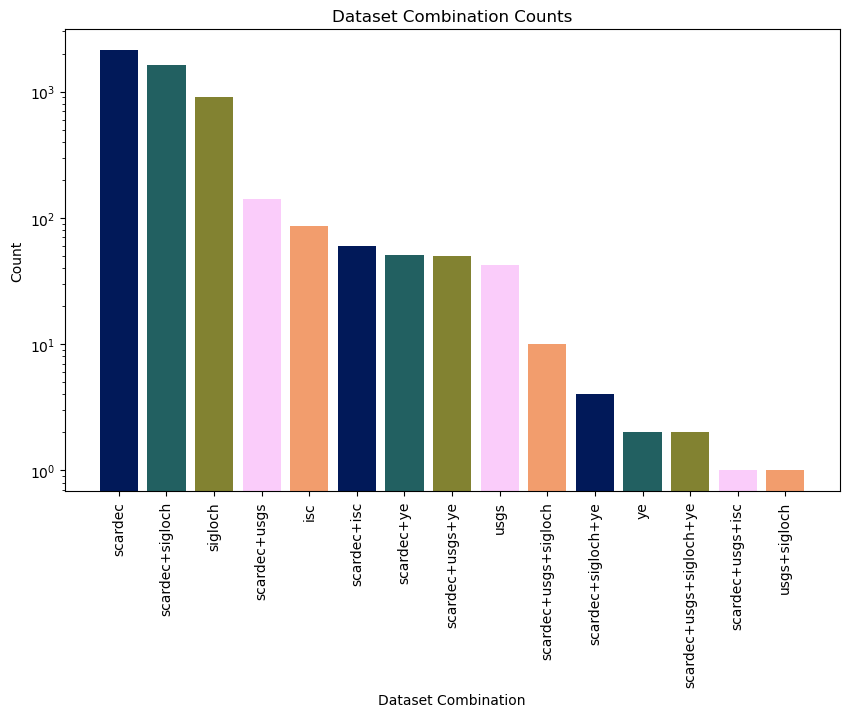

In [19]:
# Plot filtered_combination_counts as a single stacked bar
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(filtered_combination_counts.index, filtered_combination_counts.values, color=colors_for_pi)
ax.set_xticklabels(filtered_combination_counts.index, rotation=90)
ax.set_yscale('log')
ax.set_title('Dataset Combination Counts')
ax.set_xlabel('Dataset Combination')
ax.set_ylabel('Count')
plt.show()

In [ ]:
fig = pygmt.Figure()

# Create a map with Robinson projection
fig.basemap(region="d", projection="R12i", frame=True)
fig.coast(shorelines=True, borders=[1, 2], water="skyblue", land="gray")

# Ensure that the latitude and longitude arrays do not contain NaN values
for dataset in unique_datasets:
	subset = dataset_info[dataset_info['dataset'] == dataset].dropna(subset=['latitude', 'longitude'])
	fig.plot(x=subset['longitude'], y=subset['latitude'])

fig.legend()
fig.show()


Exception ignored on calling ctypes callback function <function Session.create.<locals>.print_func at 0x7fca64782980>:
Traceback (most recent call last):
  File "/home/earthquakes1/software/Ubuntu/anaconda3/envs/pygmt/lib/python3.13/site-packages/pygmt/clib/session.py", line 378, in print_func
    @ctp.CFUNCTYPE(ctp.c_int, ctp.c_void_p, ctp.c_char_p)
KeyboardInterrupt: 


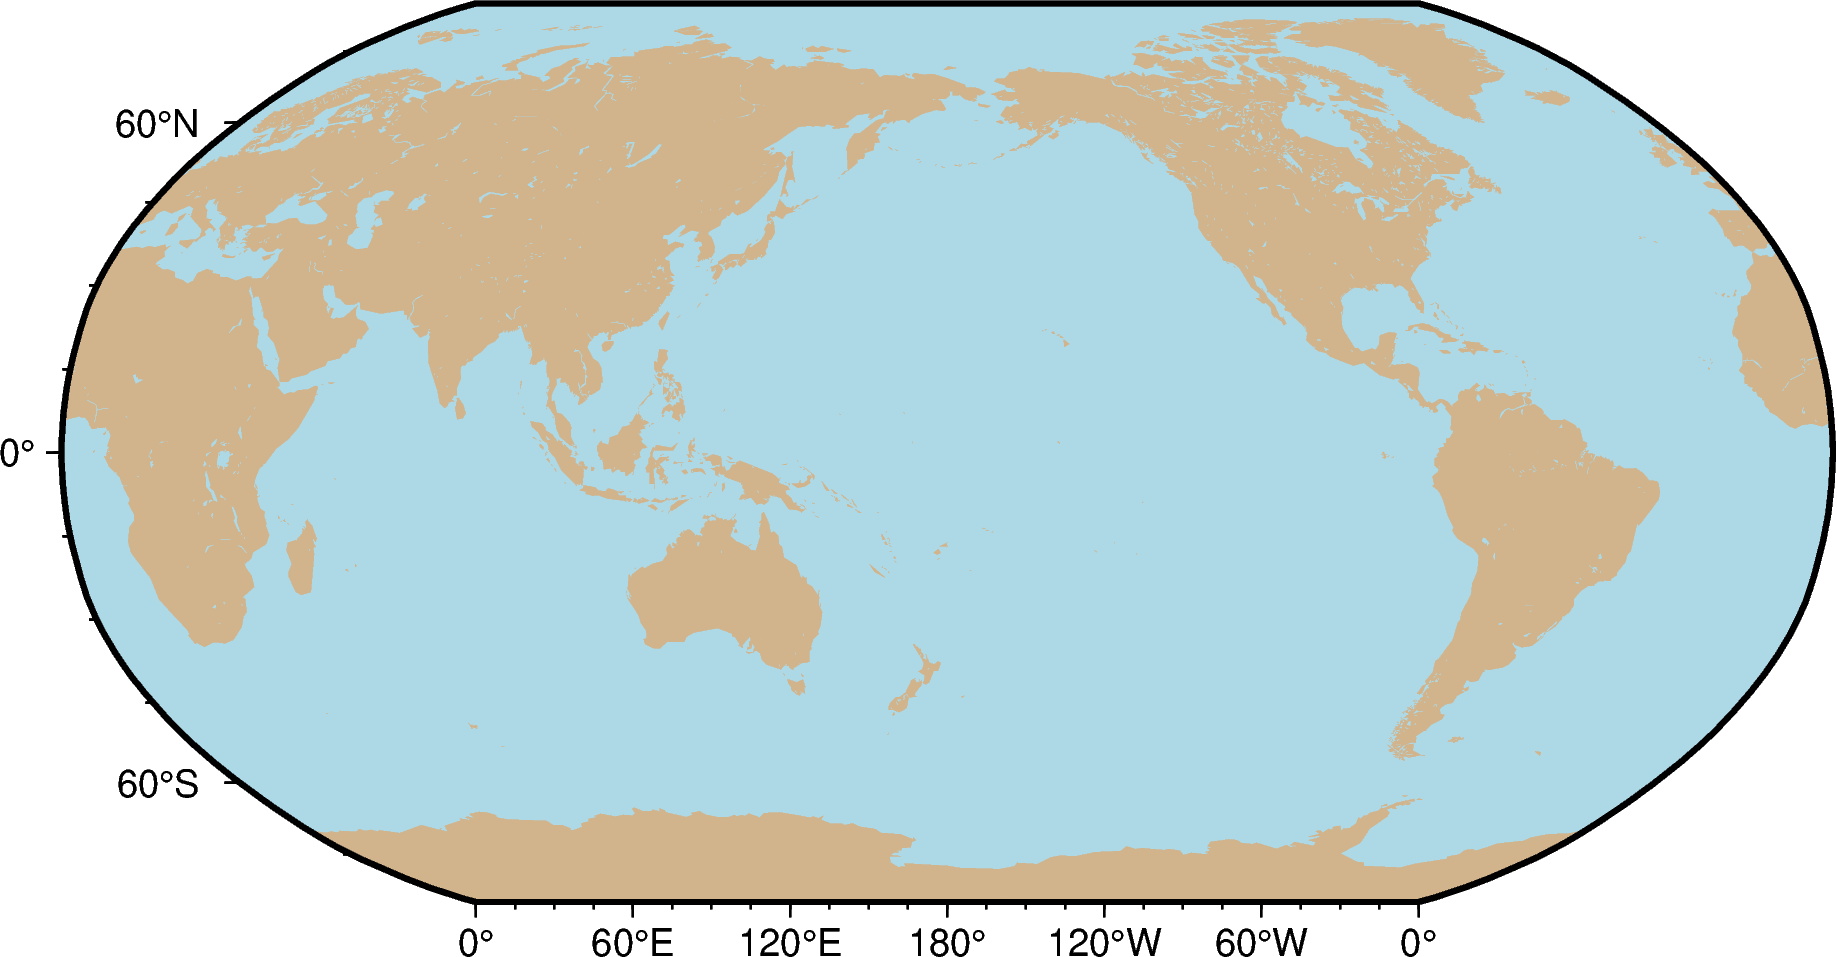

In [14]:
fig = pygmt.Figure()
fig.coast(projection="N15c", region="g", frame=True, land="tan", water="lightblue")
fig.plot(x=dataset_info['longitude'], y=dataset_info['latitude'], style="c", size = 0.5)
fig.show()

Exception ignored on calling ctypes callback function <function Session.create.<locals>.print_func at 0x7f5750a60a40>:
Traceback (most recent call last):
  File "/home/earthquakes1/software/Ubuntu/anaconda3/envs/pygmt/lib/python3.13/site-packages/pygmt/clib/session.py", line 378, in print_func
    @ctp.CFUNCTYPE(ctp.c_int, ctp.c_void_p, ctp.c_char_p)
KeyboardInterrupt: 


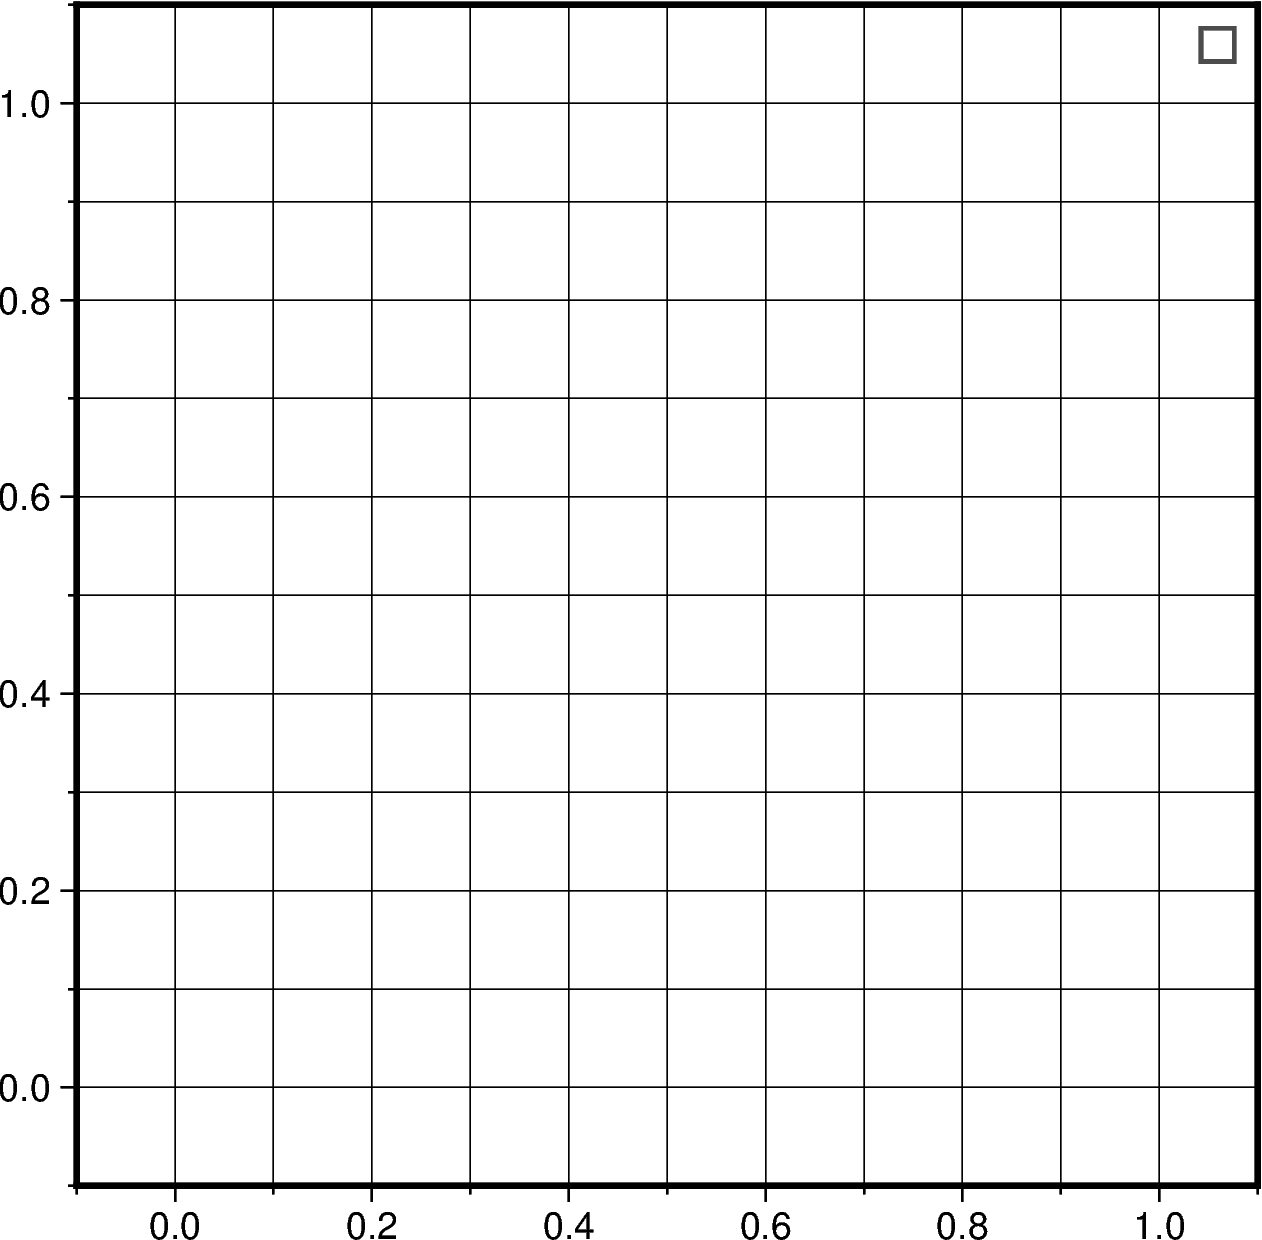

In [18]:
np.random.seed(19680801)
n = 200  # number of random data points

fig = pygmt.Figure()
fig.basemap(
    region=[-0.1, 1.1, -0.1, 1.1],
    projection="X10c/10c",
    frame=["xa0.2fg", "ya0.2fg", "WSrt"],
)
for color in ["blue", "orange", "green"]:
    x, y = np.random.rand(2, n)  # random X and Y data in [0,1]
    sizes = np.random.rand(n) * 0.5  # random size [0,0.5], in cm
    # plot data points as circles (style="c"), with different sizes
    fig.plot(
        x=x,
        y=y,
        style="c",

    )

fig.legend(transparency=30)  # set transparency level for legends
fig.show()

In [17]:
import pygmt
data = pygmt.datasets.load_japan_quakes()
region = [
    data.longitude.min() - 1,
    data.longitude.max() + 1,
    data.latitude.min() - 1,
    data.latitude.max() + 1,
]
print(region)
print(data.head())

fig = pygmt.Figure()
fig.basemap(region=region, projection="M15c", frame=True)
fig.coast(land="black", water="skyblue")
pygmt.makecpt(cmap="viridis", series=[data.depth_km.min(), data.depth_km.max()])
fig.plot(
    x=data.longitude,
    y=data.latitude,
    sizes=0.02 * 2 ** data.magnitude,
    color=data.depth_km,
    cmap=True,
    style="cc",
    pen="black",
)
fig.colorbar(frame='af+l"Depth (km)"')
fig.show()

AttributeError: module 'pygmt.datasets' has no attribute 'load_japan_quakes'